In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()
              

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [26]:
#let's find categorical variable
for i in df.columns:
    if df[i].dtype=='object':
        print(i)   

Department
salary


In [27]:
print(df['salary'].dtype)
print(df['satisfaction_level'].dtype)

object
float64


In [28]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [29]:
print(df.Department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


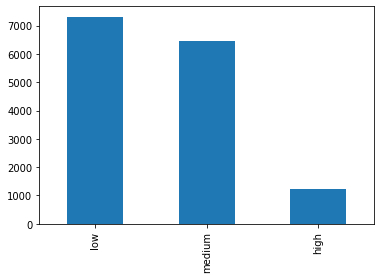

In [35]:
df.salary.value_counts().plot(kind='bar')

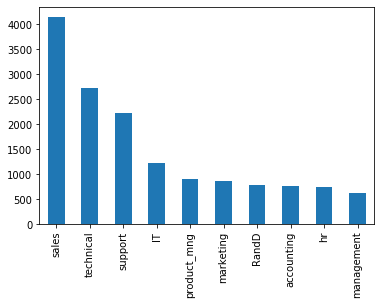

In [36]:
df.Department.value_counts().plot(kind='bar')

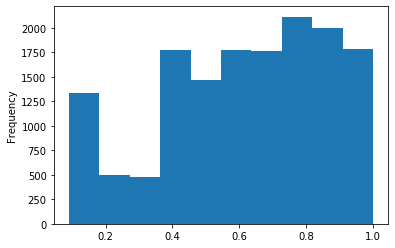

In [37]:
df['satisfaction_level'].plot(kind='hist')

In [38]:
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

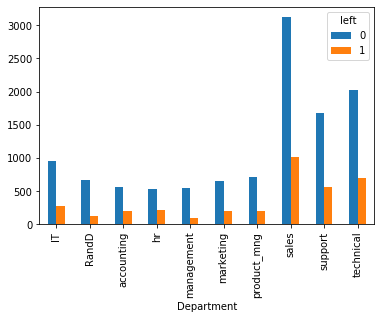

In [39]:
df.groupby(['Department','left']).size().unstack('left').plot(kind='bar')

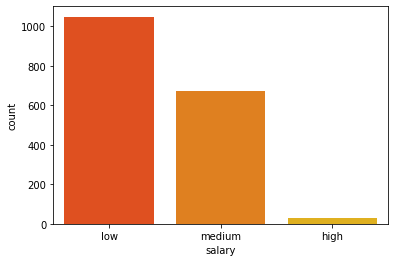

In [42]:
b=df[(df['last_evaluation']>0.7) & (df['average_montly_hours']>220) & df['left']==1]
sb.countplot(data=b, x=b.salary, palette= 'autumn', order =['low', 'medium', 'high'])

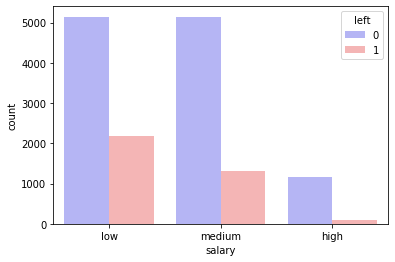

In [45]:
sb.countplot(data = df, x = 'salary', hue ='left',palette = 'bwr')

In [48]:
salary = pd.get_dummies(df.salary, drop_first = True)
df1 = pd.concat([df,salary], axis=1)
df1.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0


In [52]:
df1 = df1.drop(['Department','salary'], axis=1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


In [54]:
df1.shape

(14999, 10)

In [55]:
x = df1.drop(['left'], axis=1)
y = df1.left

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1 )

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7933333333333333

In [62]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
x_test['Predicted_left/not_left']= y_pred

C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium,Predicted_left/not_left
2946,0.51,0.79,5,267,3,0,0,0,1,0
1889,0.11,0.95,6,279,4,0,0,1,0,1
6391,0.59,0.59,4,270,2,0,0,1,0,0
5438,0.93,0.83,4,225,2,0,0,0,1,0
6542,0.71,0.60,2,251,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9416,0.13,0.62,3,264,6,0,0,1,0,1
11007,0.49,0.67,2,190,8,0,0,0,1,1
12158,0.39,0.50,2,136,3,0,0,1,0,0
10844,0.51,0.86,4,260,3,1,0,1,0,0


In [67]:
x_test=x_test.drop(['Predicted_left/not_left'],axis=1)

In [68]:
x_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
2946,0.51,0.79,5,267,3,0,0,0,1
1889,0.11,0.95,6,279,4,0,0,1,0
6391,0.59,0.59,4,270,2,0,0,1,0
5438,0.93,0.83,4,225,2,0,0,0,1
6542,0.71,0.60,2,251,3,0,0,1,0


In [71]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
c

array([[1069,   82],
       [ 228,  121]], dtype=int64)

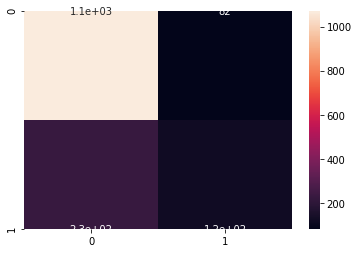

In [73]:
sb.heatmap(c,annot=True)

In [74]:
#dtree
from sklearn.tree import DecisionTreeClassifier
model1=  DecisionTreeClassifier()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
model1.score(x_test, y_test)

0.9853333333333333

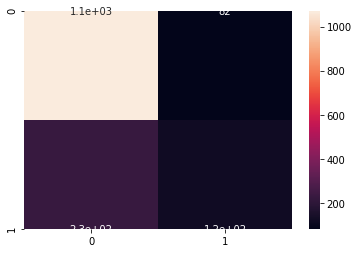

In [76]:
c=confusion_matrix(y_test,y_pred)
sb.heatmap(c,annot=True)

In [77]:
from sklearn.ensemble import RandomForestClassifier
model2=  RandomForestClassifier(n_estimators=15)
model2.fit(x_train, y_train)
y_pred1 = model2.predict(x_test)
model2.score(x_test, y_test)

0.9933333333333333

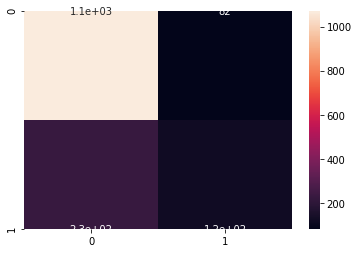

In [78]:
c=confusion_matrix(y_test,y_pred)
sb.heatmap(c,annot=True)

In [79]:
c

array([[1069,   82],
       [ 228,  121]], dtype=int64)

In [ ]:
from sklearn.svm import SVC
model3=  SVC()
model3.fit(x_train, y_train)
y_pred1 = model3.predict(x_test)
model3.score(x_test, y_test)